# Closeness Centrality

## Load Data

In [111]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
import networkx as nx
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/tugas_ppw/suararakyat.csv")
data

,Judul,Isi,Kategori
0,"Hadiri Seminar Nasional, Slamet Ariyadi Gemble...","PAMEKASAN,Suararakyat.id– Slamet Ariyadi luang...",Pendidikan
1,SIAP !! Cerdaskan Siswa-Siswi SD Negeri Giliba...,Mahasiswa UTM adakan Gerakan Memasyarakatkan M...,Pendidikan
2,Direktur Pasca Sarjana IAIN Madura Ajak Mahasi...,"PAMEKASAN,Suararakyat.id– Kegiatan Kuliah Peng...",Pendidikan
3,MK Tolak Gugatan Usia Minimal Capres-Cawapres ...,"JAKARTA, Suararakyat.id–Mahkamah Konstitusi (M...",Politik
4,Sukes Gelar Festival Nasyid Islami :Al-Amin Al...,"SUMENEP,Suararakyat.id– Dalam Rangka Memeriahk...",Pendidikan
...,...,...,...
140,MK Tolak Gugatan Usia Minimal Capres-Cawapres ...,"JAKARTA, Suararakyat.id–Mahkamah Konstitusi (M...",Politik
141,BEM SI Akan Gelar Aksi Demo Besar-Besaran pada...,"JAKARTA, Suararakyat.id– Badan Eksekutif Mahas...",Politik
142,Sportif Cup 2022 : Tim Voli Remaja BPRS siap T...,"SUMENEP,Suararakyat.id– Tim kuat Remaja BPRS a...",Sport
143,"Bupati Sumenep Buka JJC, Minta Guru Memberikan...","SUMENEP,Suararakyat.id– Dinas Pendidikan (Disd...",Pendidikan


In [113]:
pd.crosstab(index=data['Kategori'], columns='count')

col_0,count
Kategori,
Pendidikan,94
Politik,18
Sport,33


## Tokenisasi per Kalimat

In [114]:
hasil_kalimat=[]
for i in range(len(data)):
  token = sent_tokenize(data['Isi'][i])
  hasil_kalimat.append(token)

In [115]:
kalimat = []
for i in range(len(hasil_kalimat)):
  for x in range (len(hasil_kalimat[i])):
    datacek = []
    datacek.append(i)
    datacek.append(hasil_kalimat[i][x])
    kalimat.append(datacek)

In [116]:
databaru = pd.DataFrame(kalimat, columns=["Dokumen ke", "Kalimat"])
databaru

,Dokumen ke,Kalimat
0,0,"PAMEKASAN,Suararakyat.id– Slamet Ariyadi luang..."
1,0,Kedatangan DPR RI tersebut diundang langsung s...
2,0,Setelah itu dimulai acara inti.Ketua DPRD Pame...
3,0,(Idrus)
4,1,Mahasiswa UTM adakan Gerakan Memasyarakatkan M...
...,...,...
991,143,Acara dilaksanakan di lapangan kantor Pemda Ka...
992,143,(JV)
993,144,"PAMEKASAN,Suararakyat.id– Forum Lembaga legisl..."
994,144,Dirinya dipercaya untuk maju menjadi koordinat...


## Cleansing

In [117]:
#Remove Puncutuation
clean_symbol = re.compile('[^\w\s.?!,/]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = databaru['Kalimat'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean['Dokumen ke']=databaru['Dokumen ke'].values
clean

,Kalimat,Dokumen ke
0,"PAMEKASAN,Suararakyat.id Slamet Ariyadi luang...",0
1,Kedatangan DPR RI tersebut diundang langsung s...,0
2,Setelah itu dimulai acara inti.Ketua DPRD Pame...,0
3,Idrus,0
4,Mahasiswa UTM adakan Gerakan Memasyarakatkan M...,1
...,...,...
991,Acara dilaksanakan di lapangan kantor Pemda Ka...,143
992,JV,143
993,"PAMEKASAN,Suararakyat.id Forum Lembaga legisl...",144
994,Dirinya dipercaya untuk maju menjadi koordinat...,144


## TF-TDF

In [118]:
# Menghitung TF-IDF

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(clean['Kalimat'])

## Cosine Similarity

In [119]:
# Menghitung cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
len(cosine_similarities)

996

In [122]:
threshold=0.5
G = nx.Graph()
for i in range(len(cosine_similarities)):
    for j in range( len(cosine_similarities)):
      sim = cosine_similarities[i][j]
      if sim > threshold:
        G.add_edge(i, j, weight=sim)
        print(i,',',j,'=',sim)

0 , 0 = 1.0000000000000002
1 , 1 = 1.0000000000000002
2 , 2 = 1.0000000000000002
3 , 3 = 1.0
3 , 18 = 1.0
3 , 114 = 1.0
3 , 153 = 1.0
3 , 213 = 1.0
3 , 276 = 1.0
3 , 282 = 1.0
3 , 288 = 1.0
3 , 320 = 1.0
3 , 325 = 1.0
3 , 327 = 1.0
3 , 436 = 1.0
3 , 506 = 1.0
3 , 522 = 1.0
3 , 547 = 1.0
3 , 558 = 1.0
3 , 611 = 1.0
3 , 620 = 1.0
3 , 716 = 1.0
3 , 750 = 1.0
3 , 753 = 1.0
3 , 917 = 1.0
3 , 995 = 1.0
4 , 4 = 1.0000000000000002
5 , 5 = 1.0000000000000002
6 , 6 = 1.0
7 , 7 = 1.0000000000000002
8 , 8 = 1.0000000000000002
9 , 9 = 1.0
10 , 10 = 1.0
10 , 56 = 1.0
10 , 74 = 1.0
10 , 119 = 1.0
10 , 126 = 1.0
10 , 191 = 1.0
10 , 205 = 1.0
10 , 224 = 1.0
10 , 339 = 1.0
10 , 382 = 1.0
10 , 393 = 1.0
10 , 398 = 1.0
10 , 429 = 1.0
10 , 460 = 1.0
10 , 472 = 1.0
10 , 482 = 1.0
10 , 528 = 1.0
10 , 536 = 1.0
10 , 590 = 1.0
10 , 600 = 1.0
10 , 609 = 1.0
10 , 624 = 1.0
10 , 703 = 1.0
10 , 710 = 1.0
10 , 714 = 1.0
10 , 760 = 1.0
10 , 765 = 1.0
10 , 778 = 0.5024758259279823
10 , 785 = 1.0
10 , 820 = 1.0
10 , 8

## Closeness Centrality

In [123]:
# # Membuat graf untuk closeness centrality
# G = nx.from_numpy_array(cosine_similarities)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menambahkan closeness centrality ke dalam dataframe kalimat
clean['Closeness Centrality'] = [closeness_centrality[i] for i in range(len(databaru))]

# Menampilkan dataframe kalimat
clean

,Kalimat,Dokumen ke,Closeness Centrality
0,"PAMEKASAN,Suararakyat.id Slamet Ariyadi luang...",0,0.000000
1,Kedatangan DPR RI tersebut diundang langsung s...,0,0.000000
2,Setelah itu dimulai acara inti.Ketua DPRD Pame...,0,0.000000
3,Idrus,0,0.022111
4,Mahasiswa UTM adakan Gerakan Memasyarakatkan M...,1,0.000000
...,...,...,...
991,Acara dilaksanakan di lapangan kantor Pemda Ka...,143,0.001005
992,JV,143,0.002010
993,"PAMEKASAN,Suararakyat.id Forum Lembaga legisl...",144,0.000000
994,Dirinya dipercaya untuk maju menjadi koordinat...,144,0.000000


In [ ]:
# databaru.to_csv('/content/drive/MyDrive/ppw/tugas/tugas_ppw/closeness_centrality_threshould.csv', index=False)

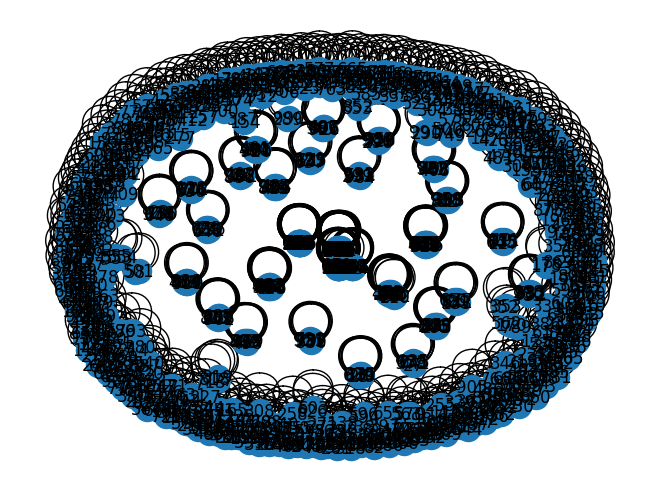

In [124]:
# pos = nx.spring_layout(G)
nx.draw(G, with_labels=True)

## Hasil Ringkasan

In [125]:
# Mengelompokkan DataFrame berdasarkan 'Dokumen ke' dan mengurutkan nilai Closeness Centrality
sorted_df = clean.sort_values(by=['Dokumen ke', 'Closeness Centrality'], ascending=[True, False]).reset_index()

# Menampilkan DataFrame yang telah diurutkan
sorted_df

,index,Kalimat,Dokumen ke,Closeness Centrality
0,3,Idrus,0,0.022111
1,0,"PAMEKASAN,Suararakyat.id Slamet Ariyadi luang...",0,0.000000
2,1,Kedatangan DPR RI tersebut diundang langsung s...,0,0.000000
3,2,Setelah itu dimulai acara inti.Ketua DPRD Pame...,0,0.000000
4,10,Sol,1,0.032161
...,...,...,...,...
991,990,"SUMENEP,Suararakyat.id Dinas Pendidikan Disd...",143,0.001005
992,991,Acara dilaksanakan di lapangan kantor Pemda Ka...,143,0.001005
993,995,Idrus,144,0.022111
994,993,"PAMEKASAN,Suararakyat.id Forum Lembaga legisl...",144,0.000000


In [126]:
# Mengambil 4 kalimat dengan nilai closeness centrality tertinggi untuk setiap 'Dokumen ke'
top_4_sentences = sorted_df.groupby('Dokumen ke').head(4)
top_4_sentences

,index,Kalimat,Dokumen ke,Closeness Centrality
0,3,Idrus,0,0.022111
1,0,"PAMEKASAN,Suararakyat.id Slamet Ariyadi luang...",0,0.000000
2,1,Kedatangan DPR RI tersebut diundang langsung s...,0,0.000000
3,2,Setelah itu dimulai acara inti.Ketua DPRD Pame...,0,0.000000
4,10,Sol,1,0.032161
...,...,...,...,...
991,990,"SUMENEP,Suararakyat.id Dinas Pendidikan Disd...",143,0.001005
992,991,Acara dilaksanakan di lapangan kantor Pemda Ka...,143,0.001005
993,995,Idrus,144,0.022111
994,993,"PAMEKASAN,Suararakyat.id Forum Lembaga legisl...",144,0.000000


In [127]:
# Menggabungkan teks 'Kalimat' berdasarkan 'Dokumen ke' yang sama
result = top_4_sentences.groupby('Dokumen ke')['Kalimat'].apply(' '.join).reset_index()

# Menampilkan hasil penggabungan
result

,Dokumen ke,Kalimat
0,0,"Idrus PAMEKASAN,Suararakyat.id Slamet Ariya..."
1,1,Sol Mahasiswa UTM adakan Gerakan Memasyaraka...
2,2,"Idrus PAMEKASAN,Suararakyat.id Kegiatan Kul..."
3,3,"Red Sesuai agenda, selain perkara yang diaju..."
4,4,"RA SUMENEP,Suararakyat.id Dalam Rangka Meme..."
...,...,...
140,140,"Red Sesuai agenda, selain perkara yang diaju..."
141,141,"Red JAKARTA, Suararakyat.id Badan Eksekutif..."
142,142,"RA SUMENEP,Suararakyat.id Tim kuat Remaja B..."
143,143,"JV SUMENEP,Suararakyat.id Dinas Pendidikan ..."


## Modelling

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [129]:
# Menghitung TF-IDF
vec = TfidfVectorizer()
tfidf_result = vec.fit_transform(result['Kalimat']).toarray()

In [130]:
y=data['Kategori']
X_train,X_test,y_train,y_test = train_test_split(tfidf_result,y,test_size=0.2,random_state=42)

In [131]:
NB = GaussianNB()
gaus=NB.fit(X_train, y_train)

In [132]:
y_pred = gaus.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 1.0
